In [73]:
import pandas as pd

file_path = 'Lekagul Sensor Data.csv'
df = pd.read_csv(file_path)
df.head(5)

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2


In [74]:
df.describe()

,Timestamp,car-id,car-type,gate-name
count,171477,171477,171477,171477
unique,170298,18708,7,40
top,2015-07-31 12:00:02,20154519024544-322,1,general-gate7
freq,5,281,67698,16119


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171477 entries, 0 to 171476
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  171477 non-null  object
 1   car-id     171477 non-null  object
 2   car-type   171477 non-null  object
 3   gate-name  171477 non-null  object
dtypes: object(4)
memory usage: 5.2+ MB


In [76]:
print(df['car-type'].unique())

car_type_dict = {
    '1': (2, 'car'),
    '2': (2, 'truck'),
    '2P': (2, 'truck'),
    '3': (3, 'truck'),
    '4': (4, 'truck'),
    '5': (2, 'bus'),
    '6': (3, 'bus')
    }
car_preserve = {
    '2P': 'preserve',
    '1': 'non-preserve',
    '2': 'non-preserve',
    '3': 'non-preserve',
    '4': 'non-preserve',
    '5': 'non-preserve',
    '6': 'non-preserve'
}

['4' '1' '3' '5' '2' '2P' '6']


In [77]:
import datetime
df = df.rename(columns={"Timestamp": "ts"})

Unique vehicle types: ['4' '1' '3' '5' '2' '2P' '6']
car-type
1     67698
2     40199
3     26427
2P    23555
4      6924
5      4485
6      2189
Name: count, dtype: int64


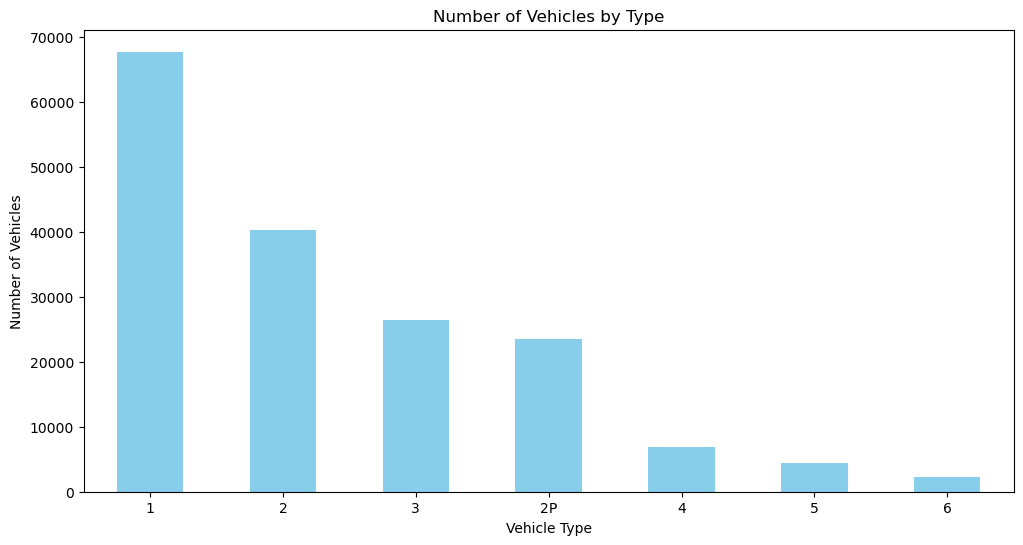

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Get the unique vehicle types
vehicle_types = data['car-type'].unique()
print(f"Unique vehicle types: {vehicle_types}")

# Analyze traffic patterns for each vehicle type
vehicle_type_counts = data['car-type'].value_counts()
print(vehicle_type_counts)

# Plot the vehicle type counts
plt.figure(figsize=(12, 6))
vehicle_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Vehicles by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)
plt.show()

Observations from Temporal Activity Plot
Vehicle Type 1: This type of vehicle has the highest traffic, peaking between 9 AM and 6 PM. This suggests a pattern consistent with day visitors.
Vehicle Type 2 and 2P: These vehicles show significant activity during the same hours but at lower volumes. Type 2P vehicles are park service vehicles, so their consistent presence indicates routine park maintenance and patrols.
Other Vehicle Types: Types 3, 4, 5, and 6 have much lower traffic, with minor peaks around the same times, indicating less frequent visits or specialized usage.

Observations from Spatial Activity Plot
Vehicle Type 1: These vehicles show high traffic through many general gates, particularly general-gate7 and general-gate8. This suggests widespread travel within the preserve.
Vehicle Type 2: Similar to Vehicle Type 1, these vehicles also show significant activity through general gates, indicating similar usage patterns.
Vehicle Type 2P: High activity at ranger-base and several ranger-stop locations, which is consistent with park service vehicles performing their duties.
Vehicle Type 3, 4, 5, and 6: These vehicles show less frequent movement, often restricted to certain gates, possibly indicating specialized or occasional usage.

Hypotheses Based on Patterns
Vehicle Type 1 and 2: Likely visitors engaging in activities such as hiking, birdwatching, or photography, given their extensive movement across general gates and high traffic during the day.
Vehicle Type 2P: Park service vehicles performing routine maintenance and monitoring, evident from their activity at ranger stops and the ranger base.
Vehicle Type 3, 4, 5, and 6: These could be delivery or maintenance vehicles, or perhaps tour buses, given their limited and specific movement patterns.

/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/2424392631.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_data['gate_type'] = path_data['gate-name'].apply(categorize_gate)
/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/2424392631.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_data['date_carid'] = path_data['Date'].astype(str) + "_" + path_data['car-id']


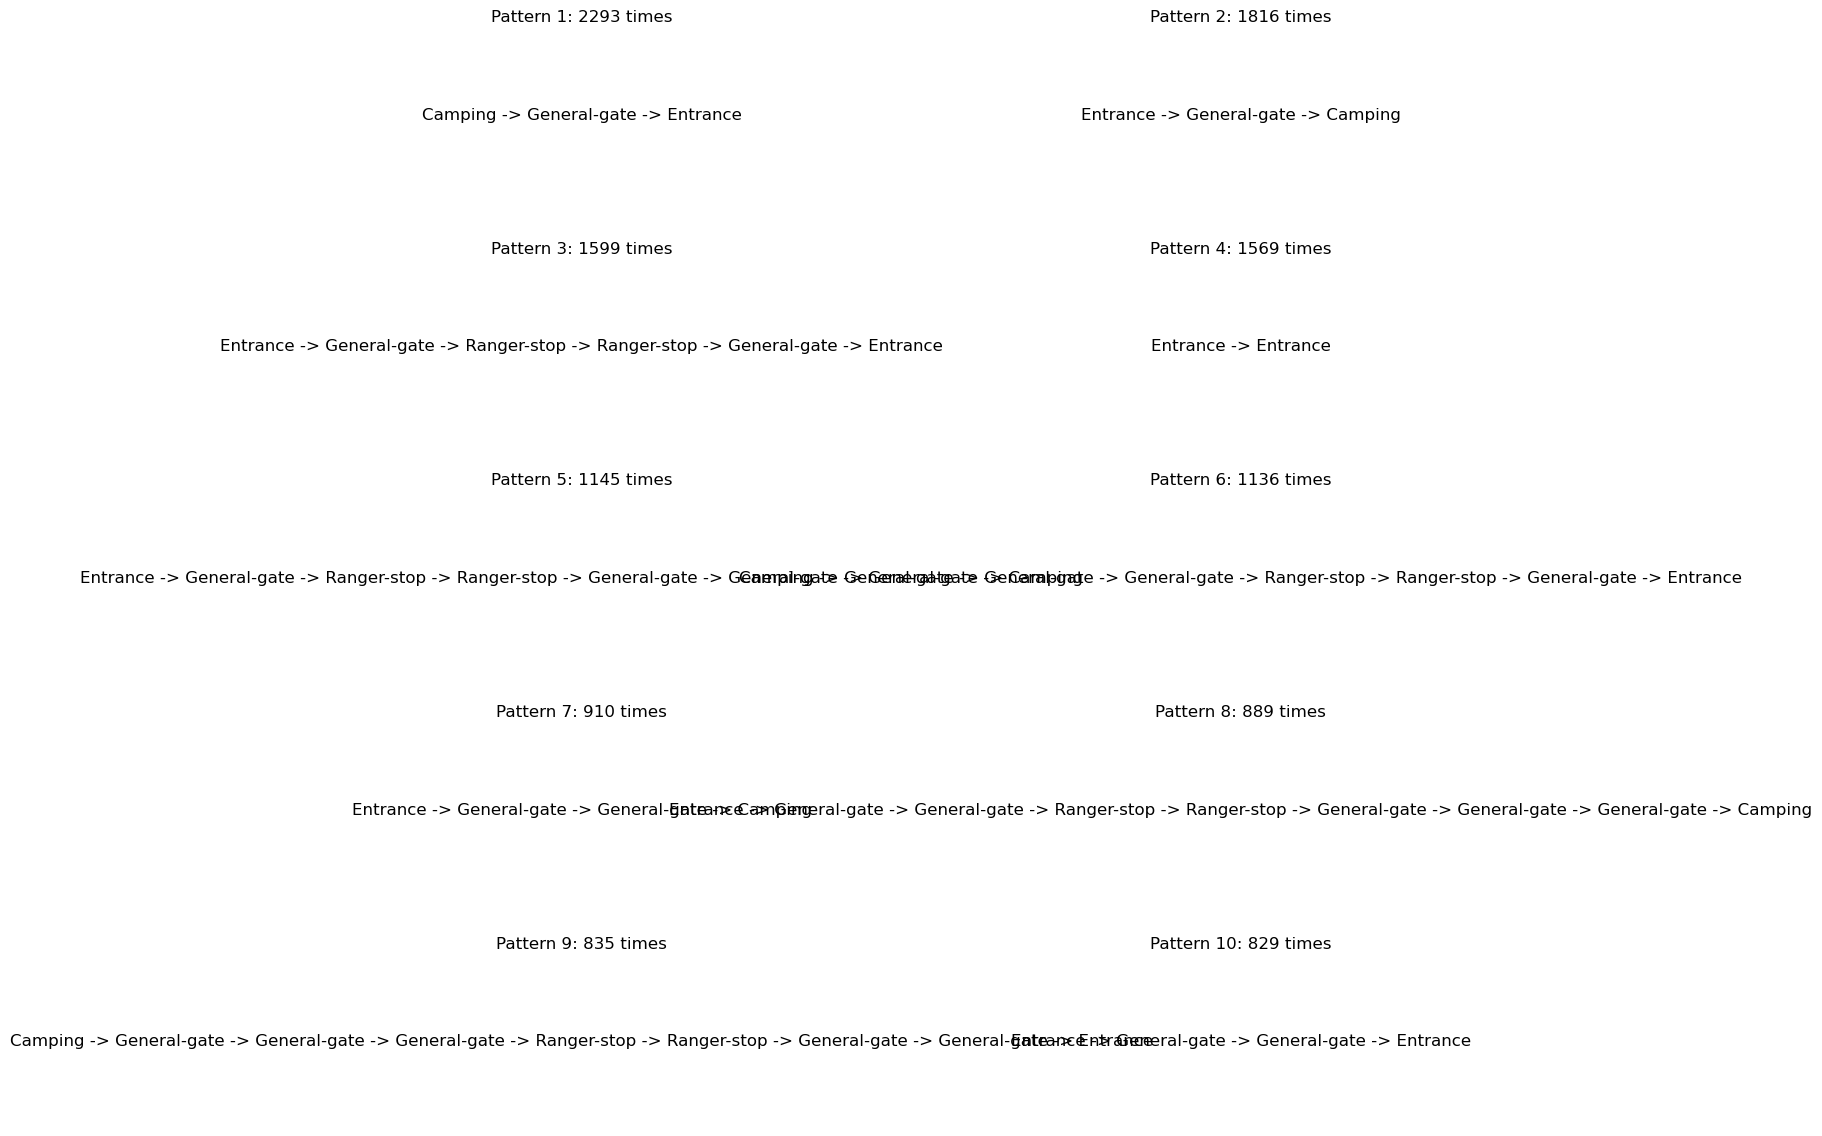

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

traffic_data = pd.read_csv(file_path)

traffic_data['Timestamp'] = pd.to_datetime(traffic_data['Timestamp'])

traffic_data['Date'] = traffic_data['Timestamp'].dt.date

traffic_data = traffic_data.sort_values(by=['car-id', 'Timestamp'])

path_data = traffic_data[['car-id', 'car-type', 'Timestamp', 'gate-name', 'Date']]

def categorize_gate(gate_name):
    if 'entrance' in gate_name:
        return 'Entrance'
    elif 'general-gate' in gate_name:
        return 'General-gate'
    elif 'gate' in gate_name and 'general-gate' not in gate_name:
        return 'Gate'
    elif 'ranger-stop' in gate_name:
        return 'Ranger-stop'
    elif 'camping' in gate_name:
        return 'Camping'
    else:
        return 'Other'

path_data['gate_type'] = path_data['gate-name'].apply(categorize_gate)

path_data['date_carid'] = path_data['Date'].astype(str) + "_" + path_data['car-id']
daily_patterns = path_data.groupby('date_carid')['gate_type'].apply(list).reset_index()

pattern_counter = Counter(daily_patterns['gate_type'].apply(tuple))

sorted_patterns = pattern_counter.most_common()

top_patterns = sorted_patterns[:10]

plt.figure(figsize=(15, 12))
for i, (pattern, count) in enumerate(top_patterns, 1):
    plt.subplot(5, 2, i)
    pattern_str = ' -> '.join(pattern)
    plt.text(0.5, 0.5, pattern_str, fontsize=12, ha='center', va='center')
    plt.title(f'Pattern {i}: {count} times')
    plt.axis('off')

plt.tight_layout(pad=3.0)
plt.show()


/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/791004183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_vehicles['Hour'] = visitor_vehicles['Timestamp'].dt.hour


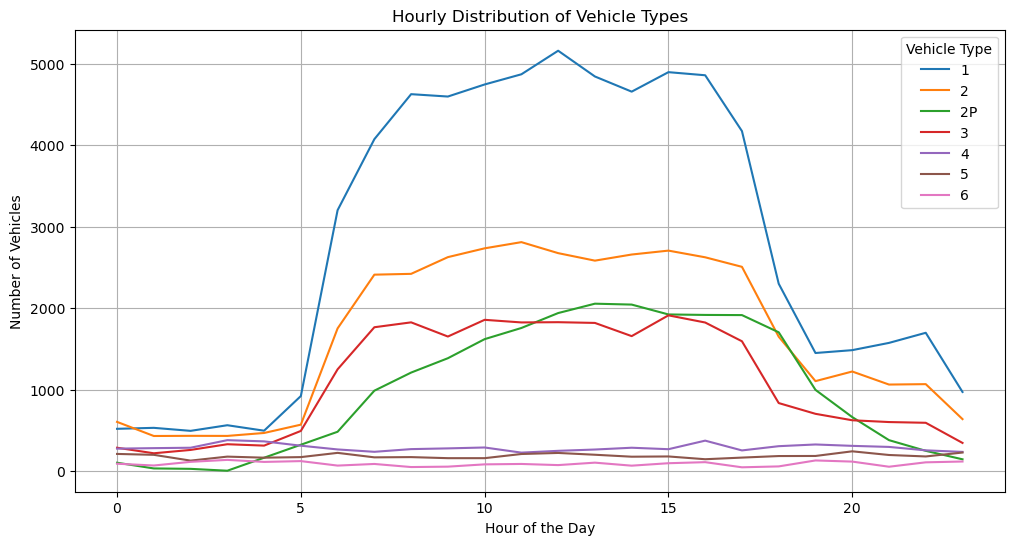

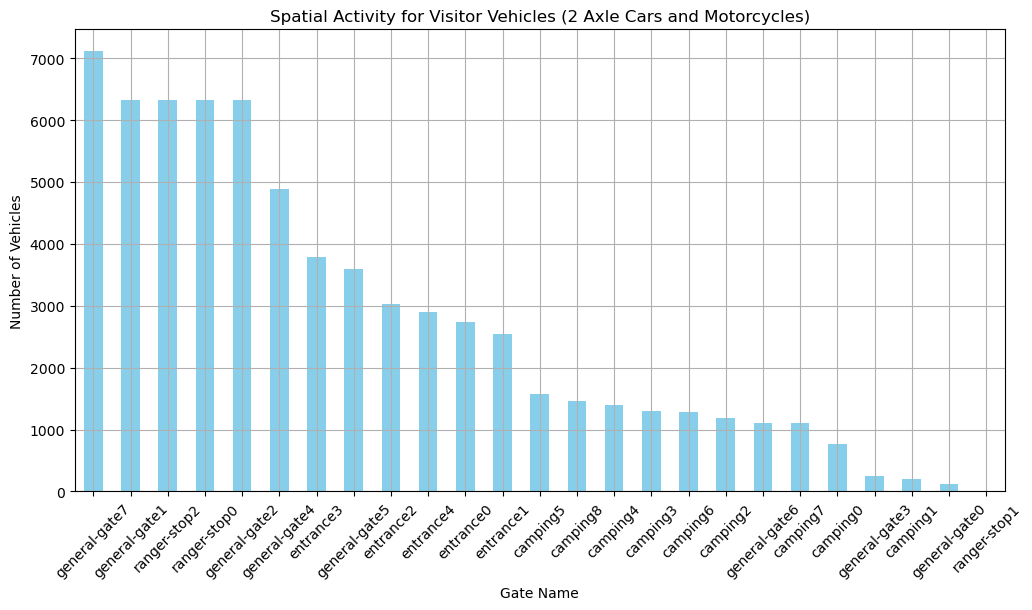

In [80]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
visitor_vehicles = data[data['car-type'] == '1']

visitor_vehicles['Hour'] = visitor_vehicles['Timestamp'].dt.hour

spatial_activity_visitor = visitor_vehicles['gate-name'].value_counts()

data['Hour'] = data['Timestamp'].dt.hour

hourly_distribution = data.groupby(['Hour', 'car-type']).size().reset_index(name='Counts')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_distribution, x='Hour', y='Counts', hue='car-type')
plt.title('Hourly Distribution of Vehicle Types')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
spatial_activity_visitor.plot(kind='bar', color='skyblue')
plt.xlabel('Gate Name')
plt.ylabel('Number of Vehicles')
plt.title('Spatial Activity for Visitor Vehicles (2 Axle Cars and Motorcycles)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/1500408469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_vehicles['Date'] = visitor_vehicles['Timestamp'].dt.date
/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/1500408469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_vehicles['Time'] = visitor_vehicles['Timestamp'].dt.time


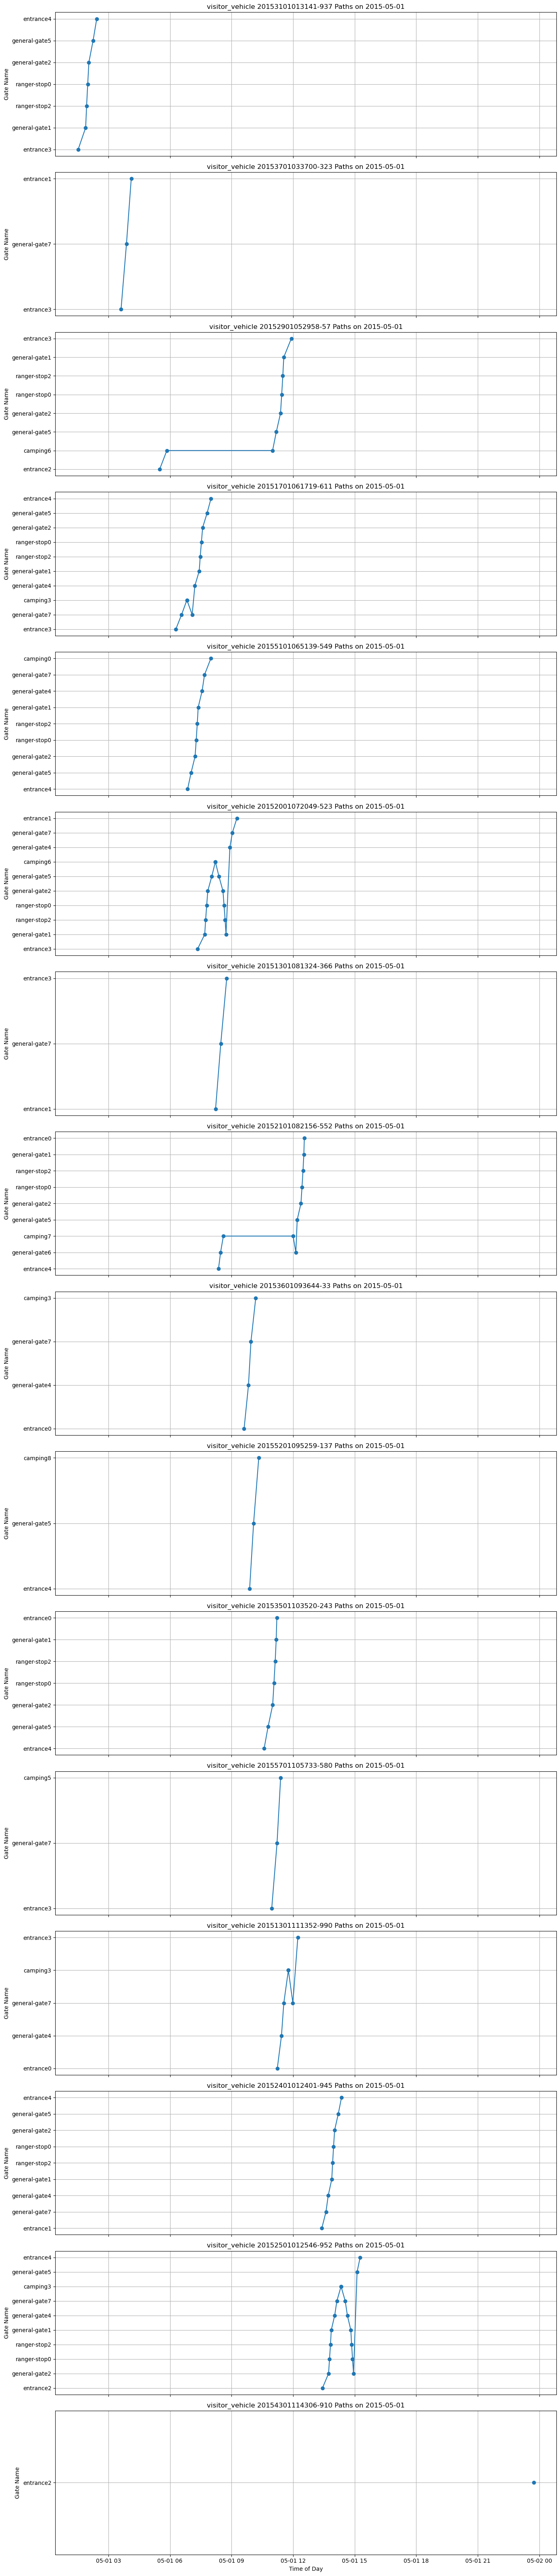

In [81]:
visitor_vehicles['Date'] = visitor_vehicles['Timestamp'].dt.date
visitor_vehicles['Time'] = visitor_vehicles['Timestamp'].dt.time

specific_date = visitor_vehicles['Date'].iloc[98] 
daily_visitor_data = visitor_vehicles[visitor_vehicles['Date'] == specific_date]

unique_vehicle_ids = daily_visitor_data['car-id'].unique()

fig, axs = plt.subplots(len(unique_vehicle_ids), 1, figsize=(14, len(unique_vehicle_ids) * 4), sharex=True)

if len(unique_vehicle_ids) == 1:
    axs = [axs] 

for i, vehicle_id in enumerate(unique_vehicle_ids):
    vehicle_data = daily_visitor_data[daily_visitor_data['car-id'] == vehicle_id]
    axs[i].plot(vehicle_data['Timestamp'], vehicle_data['gate-name'], marker='o', linestyle='-')
    
    axs[i].set_title(f'visitor_vehicle {vehicle_id} Paths on {specific_date}')
    axs[i].set_ylabel('Gate Name')
    axs[i].grid(True)

plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

Daily pattern 1

Visitor Vehicles (2 Axle Cars and Motorcycles) - Daytime Activity:

Description: These vehicles are predominantly 2 axle cars (car type '1') and motorcycles.

Temporal Activity: They show high traffic between 8 AM and 6 PM, peaking around mid-day.

Spatial Activity: These vehicles are primarily observed entering through main entrances and passing through general gates, often without staying overnight.
(most of the vehicles enter from one entrance and exits through another entrance at the end of the day signifying they are just passing through the park)

Hypothesis: These vehicles likely belong to day visitors engaging in activities like hiking, birdwatching, or picnicking.

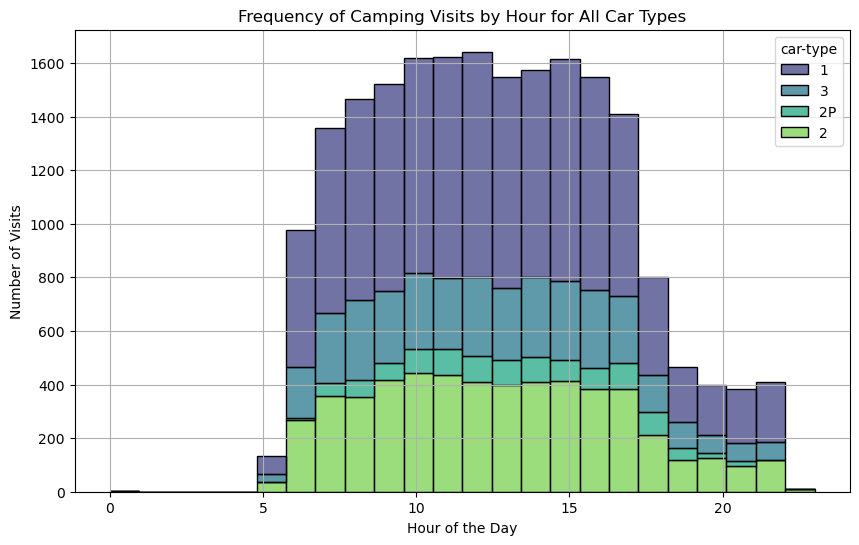

In [82]:
data['Hour'] = data['Timestamp'].dt.hour
data['Date'] = data['Timestamp'].dt.date

data['gate_type'] = data['gate-name'].apply(lambda x: 'Camping' if 'camping' in x.lower() else 'Other')

path_data = data[['car-id', 'car-type', 'Timestamp', 'gate-name', 'Date', 'Hour', 'gate_type']]

camping_data = path_data[path_data['gate_type'] == 'Camping']

plt.figure(figsize=(10, 6))
sns.histplot(data=camping_data, x='Hour', hue='car-type', multiple='stack', palette='viridis', bins=24)
plt.title('Frequency of Camping Visits by Hour for All Car Types')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()

Daily pattern 2

observation: there is no activity between 1:00 to 4:30. campings are only visited by 2Axle cars, 2Axle trucks, 3Axle trucks, and ranger vehicles

hypothesis: Maybe vehicles are not allowed to enter campings in the middle of the night (e.g., curfew)

/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/94526217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_service_vehicles['Hour'] = park_service_vehicles['Timestamp'].dt.hour


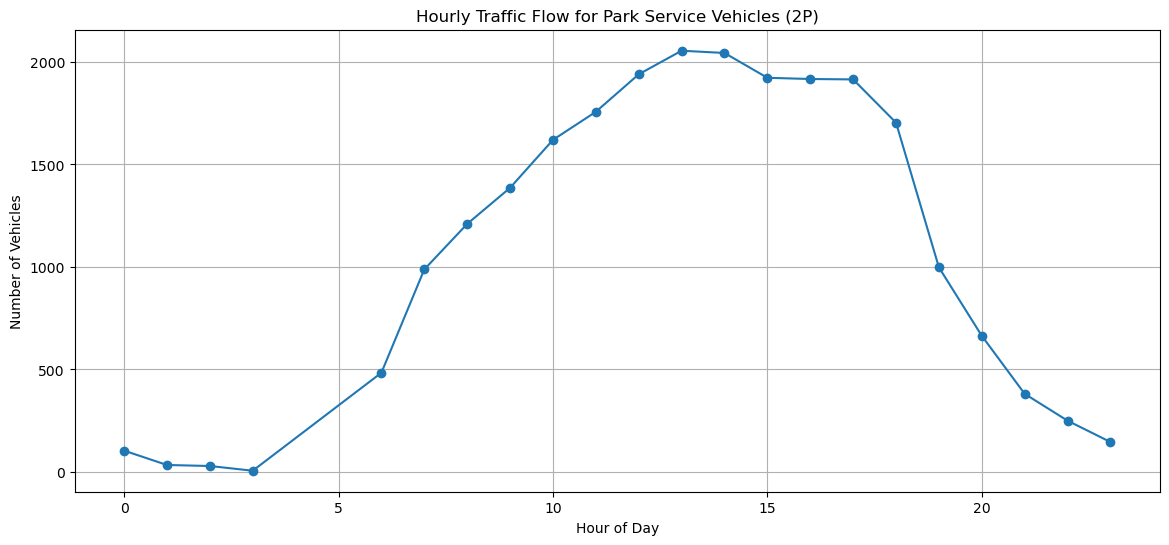

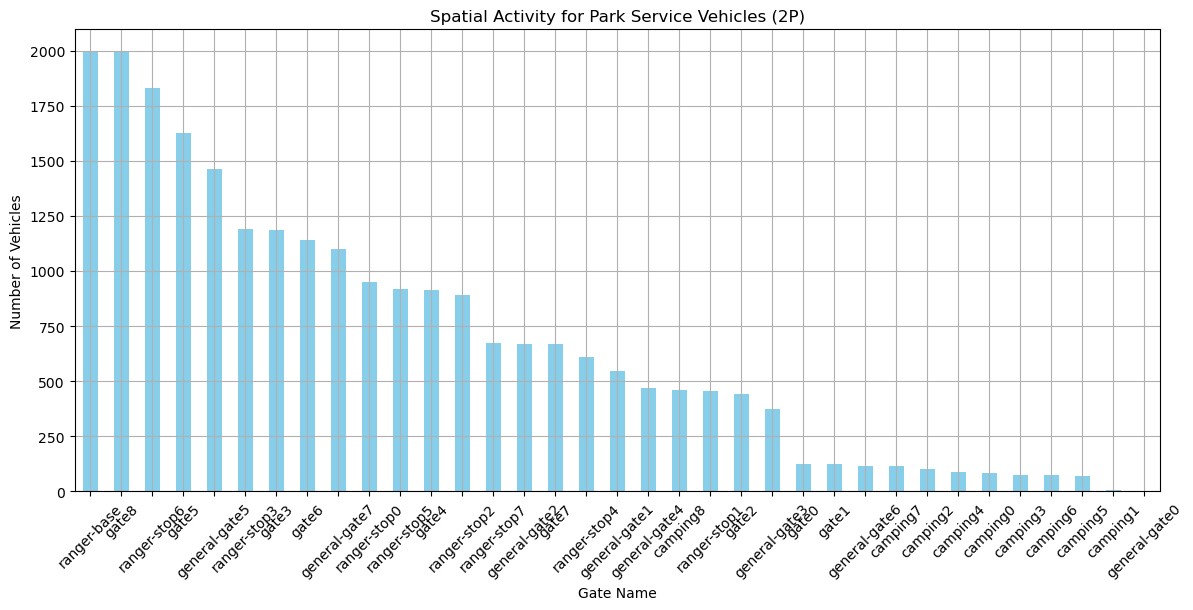

In [83]:
park_service_vehicles = data[data['car-type'] == '2P']
park_service_vehicles['Hour'] = park_service_vehicles['Timestamp'].dt.hour
hourly_traffic_park_service = park_service_vehicles.groupby('Hour').size()

spatial_activity_park_service = park_service_vehicles['gate-name'].value_counts()

plt.figure(figsize=(14, 6))
plt.plot(hourly_traffic_park_service.index, hourly_traffic_park_service, marker='o', linestyle='-')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Vehicles')
plt.title('Hourly Traffic Flow for Park Service Vehicles (2P)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
spatial_activity_park_service.plot(kind='bar', color='skyblue')
plt.xlabel('Gate Name')
plt.ylabel('Number of Vehicles')
plt.title('Spatial Activity for Park Service Vehicles (2P)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/581116619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_service_vehicles['Date'] = park_service_vehicles['Timestamp'].dt.date
/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/581116619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_service_vehicles['Time'] = park_service_vehicles['Timestamp'].dt.time
/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/581116619.py:6: MatplotlibDeprecationWarnin

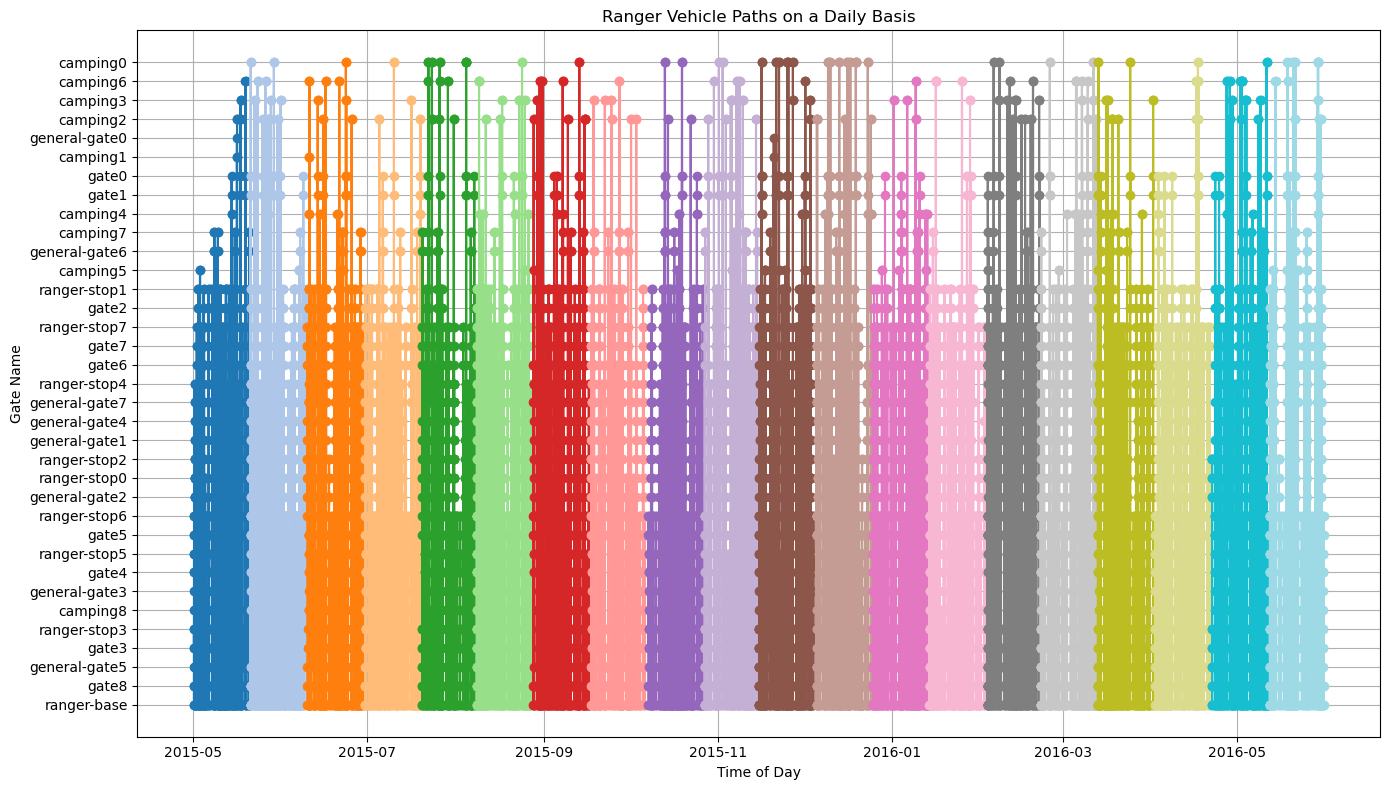

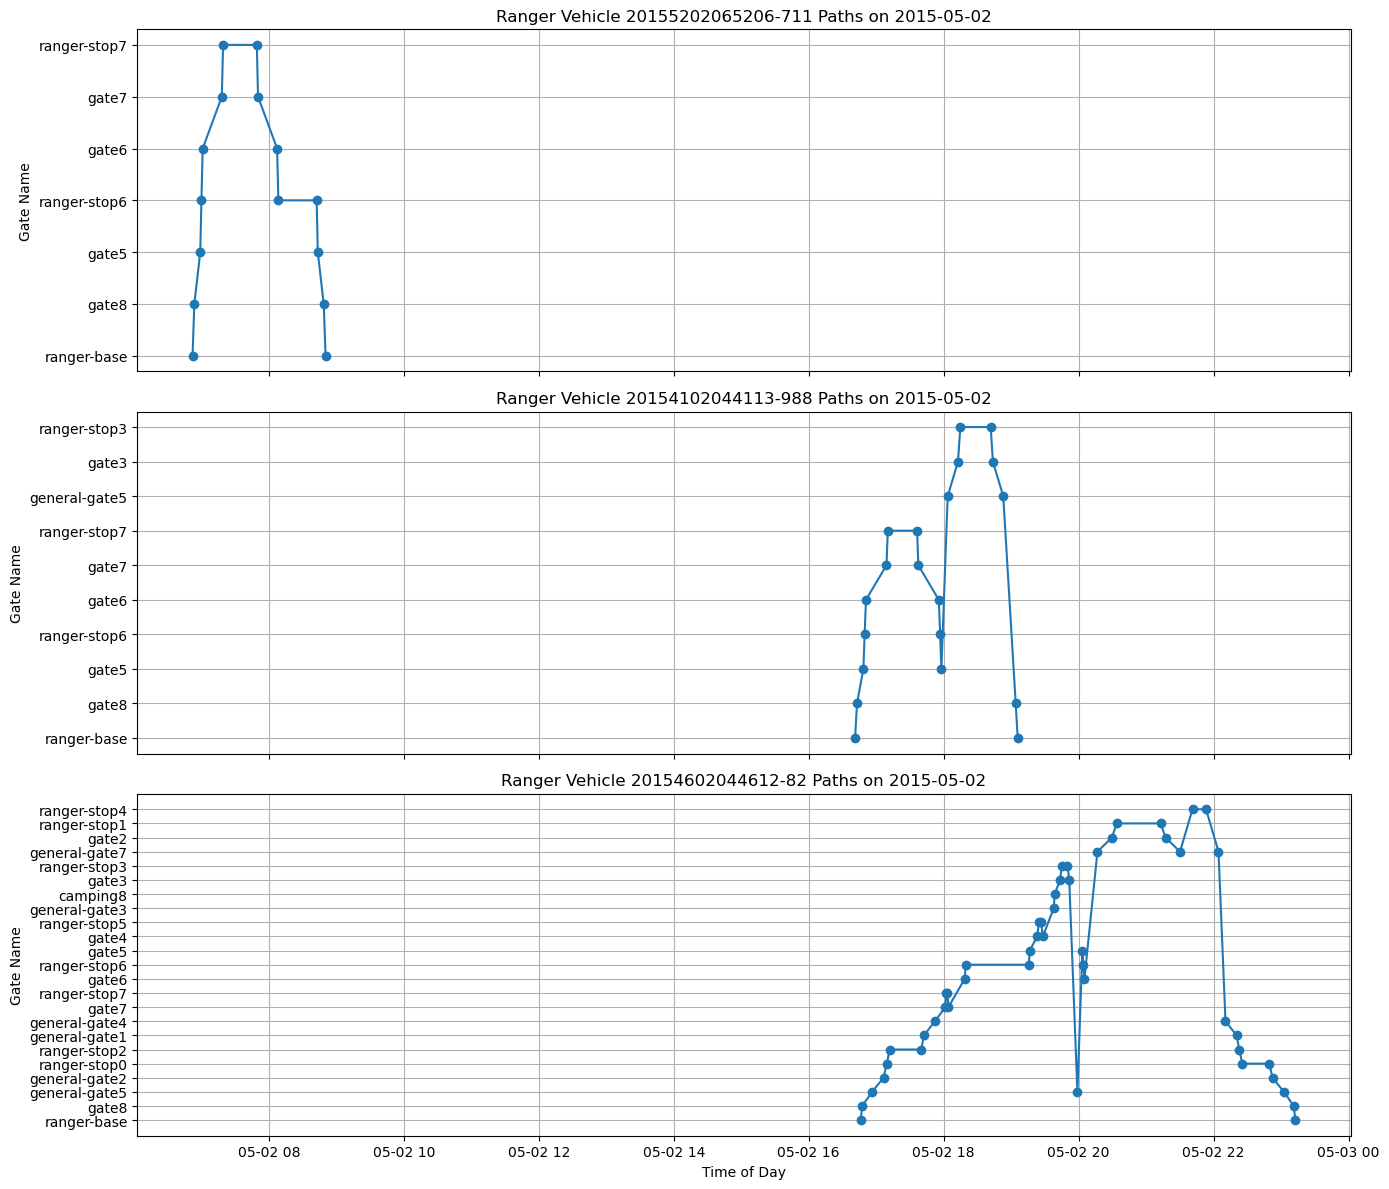

In [84]:
park_service_vehicles['Date'] = park_service_vehicles['Timestamp'].dt.date
park_service_vehicles['Time'] = park_service_vehicles['Timestamp'].dt.time


unique_dates = park_service_vehicles['Date'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_dates))

plt.figure(figsize=(14, 8))

for i, date in enumerate(unique_dates):
    daily_data = park_service_vehicles[park_service_vehicles['Date'] == date]
    plt.plot(daily_data['Timestamp'], daily_data['gate-name'], marker='o', linestyle='-', color=colors(i), label=str(date))

plt.xlabel('Time of Day')
plt.ylabel('Gate Name')
plt.title('Ranger Vehicle Paths on a Daily Basis')
plt.grid(True)
plt.tight_layout()
plt.show()

specific_date = park_service_vehicles['Date'].iloc[98]
daily_2p_data = park_service_vehicles[park_service_vehicles['Date'] == specific_date]

unique_vehicle_ids = daily_2p_data['car-id'].unique()

fig, axs = plt.subplots(len(unique_vehicle_ids), 1, figsize=(14, len(unique_vehicle_ids) * 4), sharex=True)

if len(unique_vehicle_ids) == 1:
    axs = [axs] 

for i, vehicle_id in enumerate(unique_vehicle_ids):
    vehicle_data = daily_2p_data[daily_2p_data['car-id'] == vehicle_id]
    axs[i].plot(vehicle_data['Timestamp'], vehicle_data['gate-name'], marker='o', linestyle='-')
    
    axs[i].set_title(f'Ranger Vehicle {vehicle_id} Paths on {specific_date}')
    axs[i].set_ylabel('Gate Name')
    axs[i].grid(True)

plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

Daily pattern 3
Ranger Patrols

Description: Park service vehicles are marked as 2 axle trucks with a 'P' appended (car type '2P').

Temporal Activity: These vehicles exhibit consistent activity throughout the day, starting as early as 6 AM and continuing until late evening.

Spatial Activity: They frequently pass through ranger stops, general gates, and restricted areas accessible only to park services.
they always start and ends their journey at a ranger-base.

Hypothesis: These vehicles are used by park rangers for routine patrols, maintenance, and monitoring of the park.

These vehicles start from the ranger base and move through all gates of the park, except the entrances and always return to the ranger base. The rangers are most active between 6am and 6pm. There are no patrols between 3am and 6am. Patrols end earlier on Saturday night - there are no patrols between 1 am and 6 am, presumably the rangers are having their time-off.

/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/1757040206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_vehicles['Hour'] = transport_vehicles['Timestamp'].dt.hour


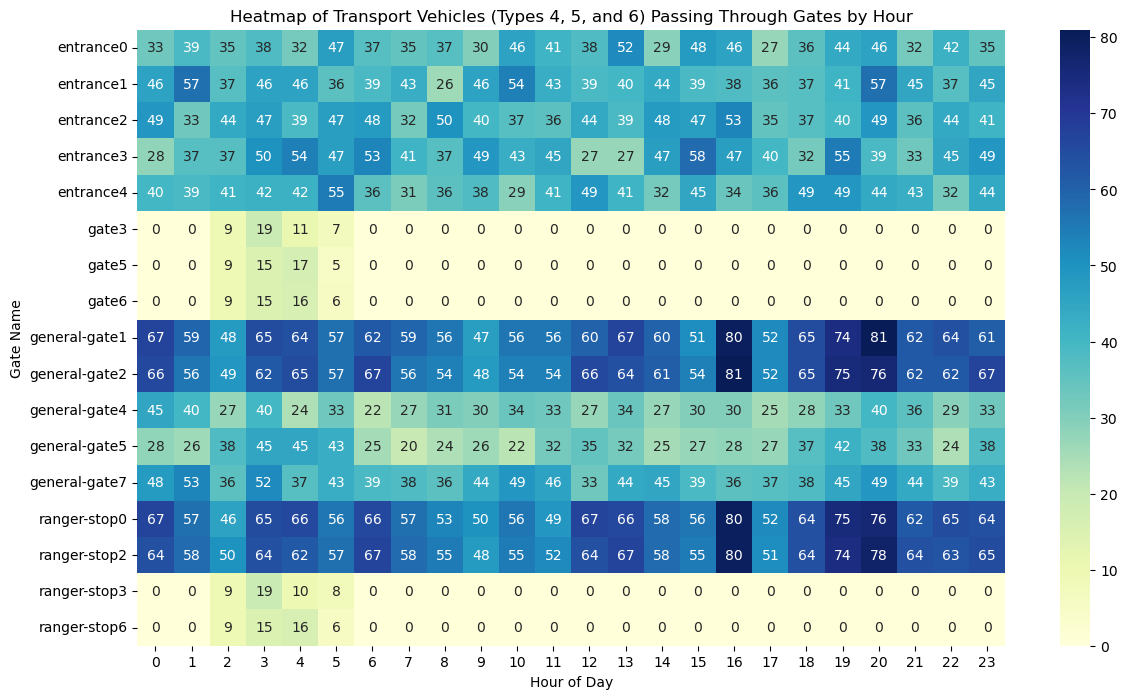

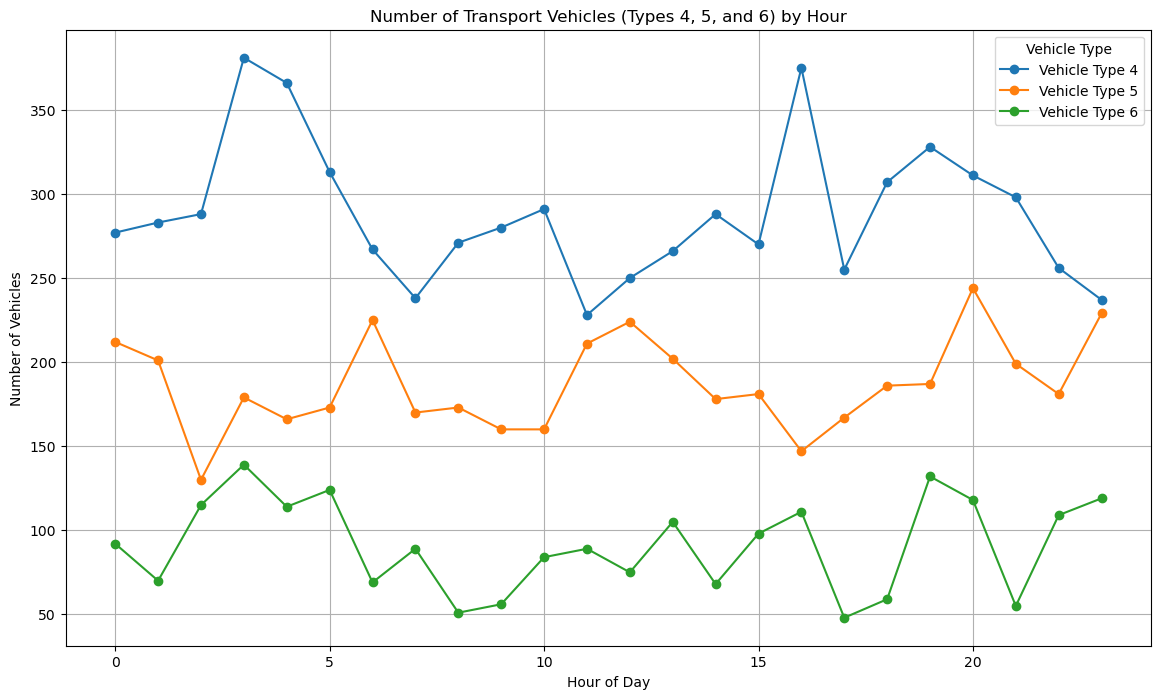

In [85]:
transport_vehicles = data[data['car-type'].isin(['4', '5', '6'])]

transport_vehicles['Hour'] = transport_vehicles['Timestamp'].dt.hour

heatmap_data = transport_vehicles.pivot_table(index='gate-name', columns='Hour', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Heatmap of Transport Vehicles (Types 4, 5, and 6) Passing Through Gates by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Gate Name')
plt.show()

vehicle_hourly_counts = transport_vehicles.groupby(['car-type', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
for car_type in vehicle_hourly_counts.index:
    plt.plot(vehicle_hourly_counts.columns, vehicle_hourly_counts.loc[car_type], marker='o', linestyle='-', label=f'Vehicle Type {car_type}')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Vehicles')
plt.title('Number of Transport Vehicles (Types 4, 5, and 6) by Hour')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()


/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/115554574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_vehicles['Date'] = transport_vehicles['Timestamp'].dt.date
/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/115554574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_vehicles['Time'] = transport_vehicles['Timestamp'].dt.time


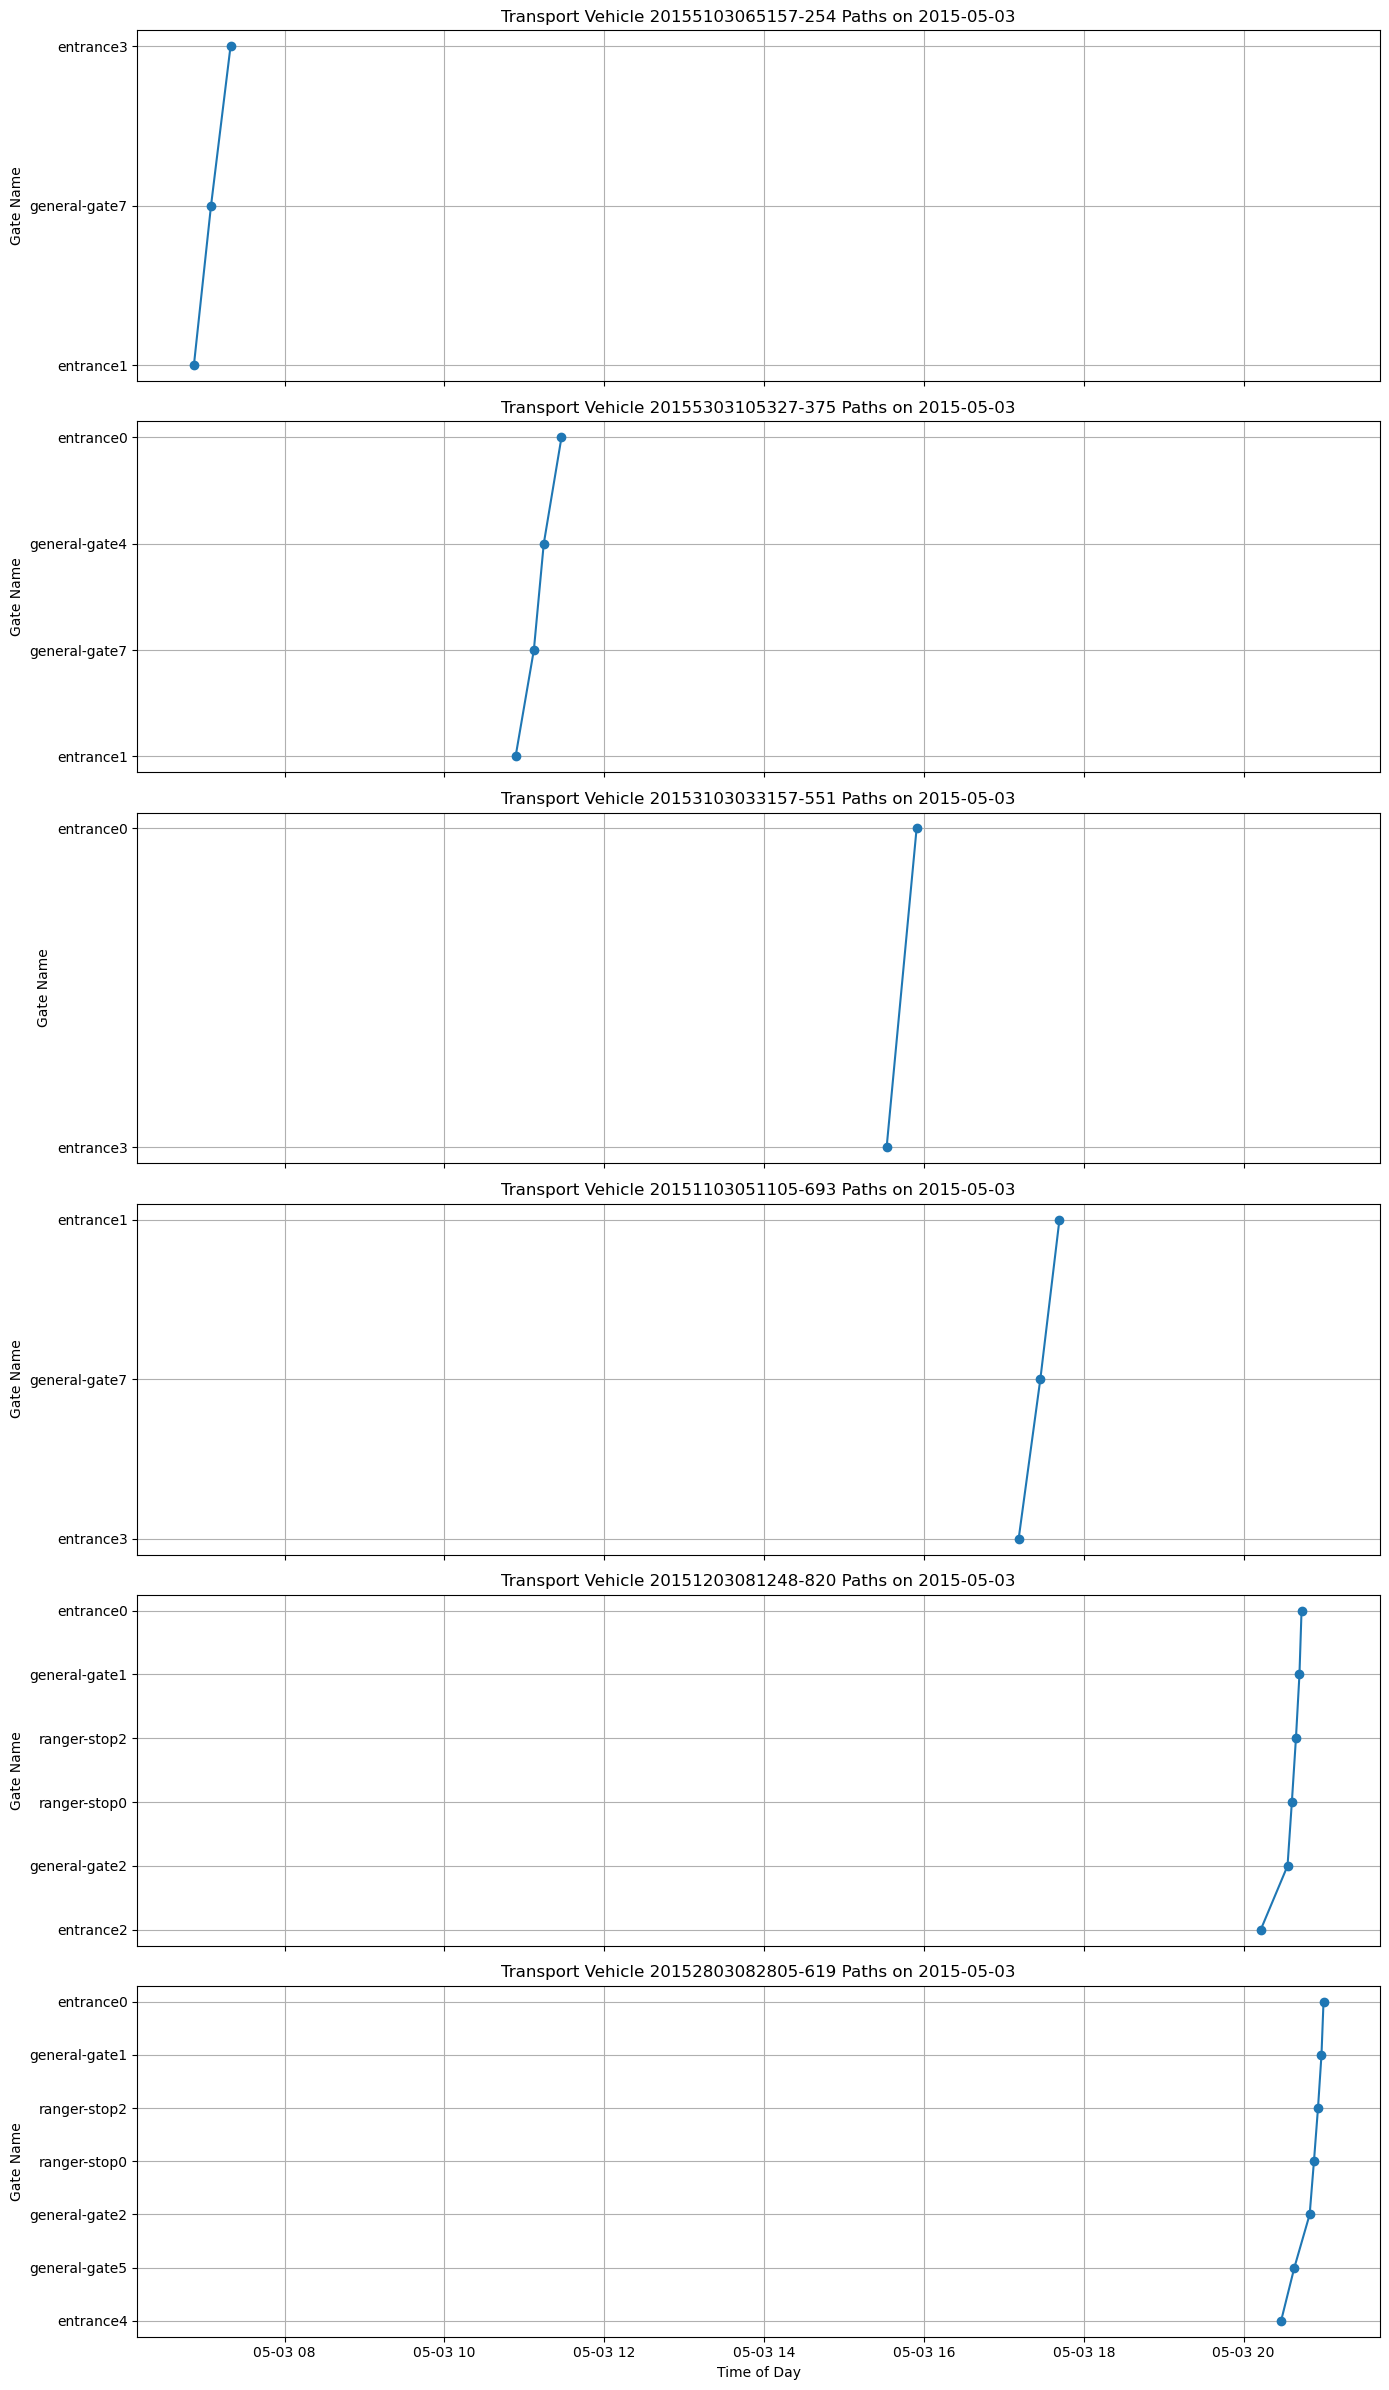

In [86]:
transport_vehicles['Date'] = transport_vehicles['Timestamp'].dt.date
transport_vehicles['Time'] = transport_vehicles['Timestamp'].dt.time

specific_date = transport_vehicles['Date'].iloc[98]
daily_transport_data = transport_vehicles[transport_vehicles['Date'] == specific_date]

unique_vehicle_ids = daily_transport_data['car-id'].unique()

fig, axs = plt.subplots(len(unique_vehicle_ids), 1, figsize=(14, len(unique_vehicle_ids) * 4), sharex=True)

if len(unique_vehicle_ids) == 1:
    axs = [axs]

for i, vehicle_id in enumerate(unique_vehicle_ids):
    vehicle_data = daily_transport_data[daily_transport_data['car-id'] == vehicle_id]
    axs[i].plot(vehicle_data['Timestamp'], vehicle_data['gate-name'], marker='o', linestyle='-')
    
    axs[i].set_title(f'Transport Vehicle {vehicle_id} Paths on {specific_date}')
    axs[i].set_ylabel('Gate Name')
    axs[i].grid(True)

plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

Daily pattern 4

Transport Vehicles

Transport vehicles of type 4, 5 and 6 pass through the park and do not stop at camping sites. They pass through the main arteries linking the entrances of the parks. Camping sites and other peripheral gates are avoided and the goal is to get from one entrance to the other. The number of vehicles remains fairly constant throughout the day. Although vehicles type 5 and 6 are buses, they do not stop at areas of interest such as camping sites.

There are several plausible explanations:

Buses are not allowed to enter camping sites due to difficult terrain or to protect the wildlife

These buses are passing through the park as a short cut or as a normal part of their journey and are ferrying people to and from areas outside the park.

/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/3108273934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camping_events['Hour'] = camping_events['Timestamp'].dt.hour


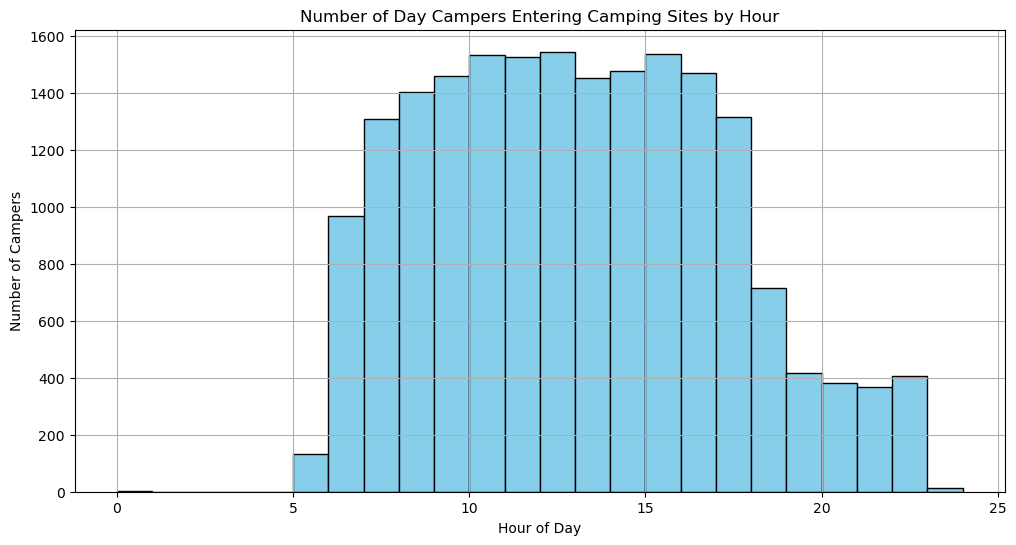

In [87]:
day_campers = data[data['car-type'].isin(['1', '2', '3'])]

camping_events = day_campers[day_campers['gate-name'].str.contains('camping')]

camping_events['Hour'] = camping_events['Timestamp'].dt.hour

plt.figure(figsize=(12, 6))
plt.hist(camping_events['Hour'], bins=24, range=(0, 24), color='skyblue', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Campers')
plt.title('Number of Day Campers Entering Camping Sites by Hour')
plt.grid(True)
plt.show()

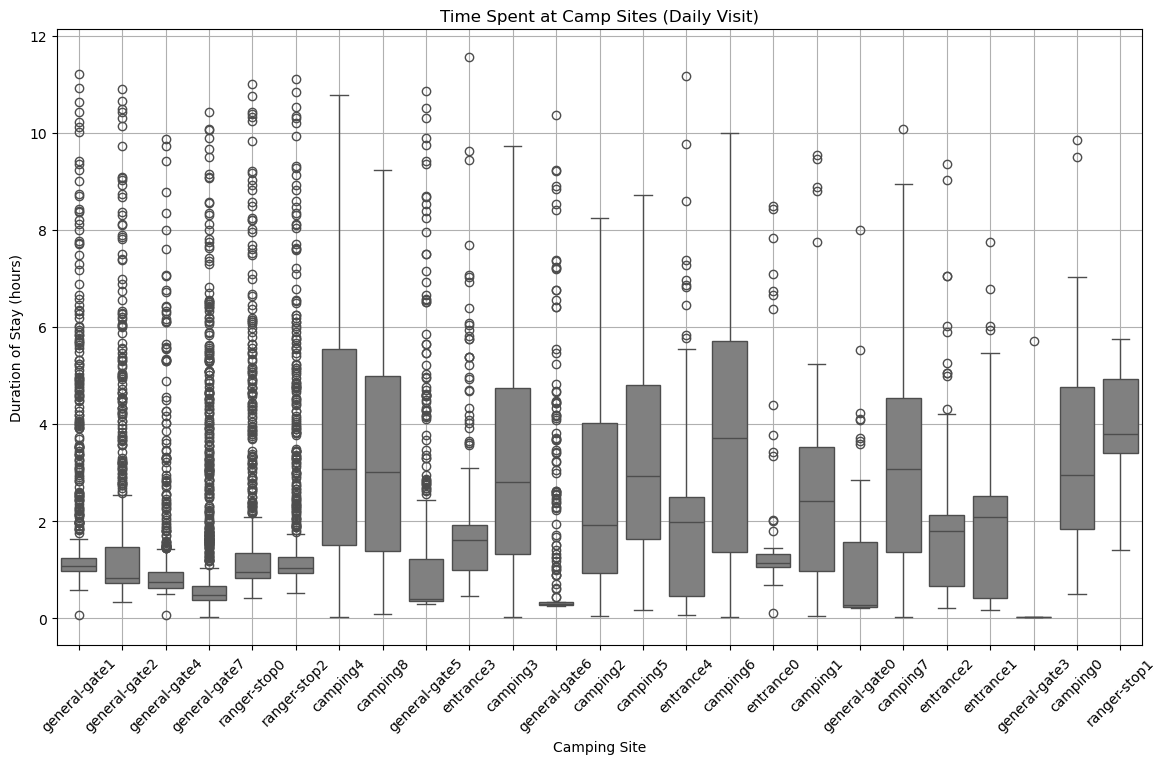

In [88]:
entry_exit_times = day_campers.groupby(['car-id', 'gate-name', 'Date']).agg({'Timestamp': ['min', 'max']}).reset_index()
entry_exit_times.columns = ['car-id', 'gate-name', 'Date', 'entry_time', 'exit_time']

entry_exit_times['duration'] = (entry_exit_times['exit_time'] - entry_exit_times['entry_time']).dt.total_seconds() / 3600  # Convert to hours

entry_exit_times = entry_exit_times[entry_exit_times['duration'] >= 0.0167]

plt.figure(figsize=(14, 8))
sns.boxplot(x='gate-name', y='duration', data=entry_exit_times, color='gray')
plt.xlabel('Camping Site')
plt.ylabel('Duration of Stay (hours)')
plt.title('Time Spent at Camp Sites (Daily Visit)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Daily pattern 5

Day campers or short term campers in vehicles types 1,2 and 3 enter the 9 different camping sites throughout the day. They enter the various camping site for different activities and then leave on the same day as their entrance; they do not stay at the camping sites overnight. Their main purpose of entering the park is to spend time at the dedicated camping areas. The length of stay at the different camps varies. These visitors may not be camping but enjoying the natural attractions at the camping sites (lakes for example) instead. Their length of stay at the camp site varies from a few minutes up to 11 hours. We observe that the campers spend the shortest amount of time at Camping 2.
The day campers tend to arrive earlier in the day, before 10am as shown by the histogram plotting their count by the hour of entry into the camp site.

Campers intending to only spend the day at a campsite would naturally plan to arrive early to maximize the time available for activities at the site before it gets dark and it’s time to leave.

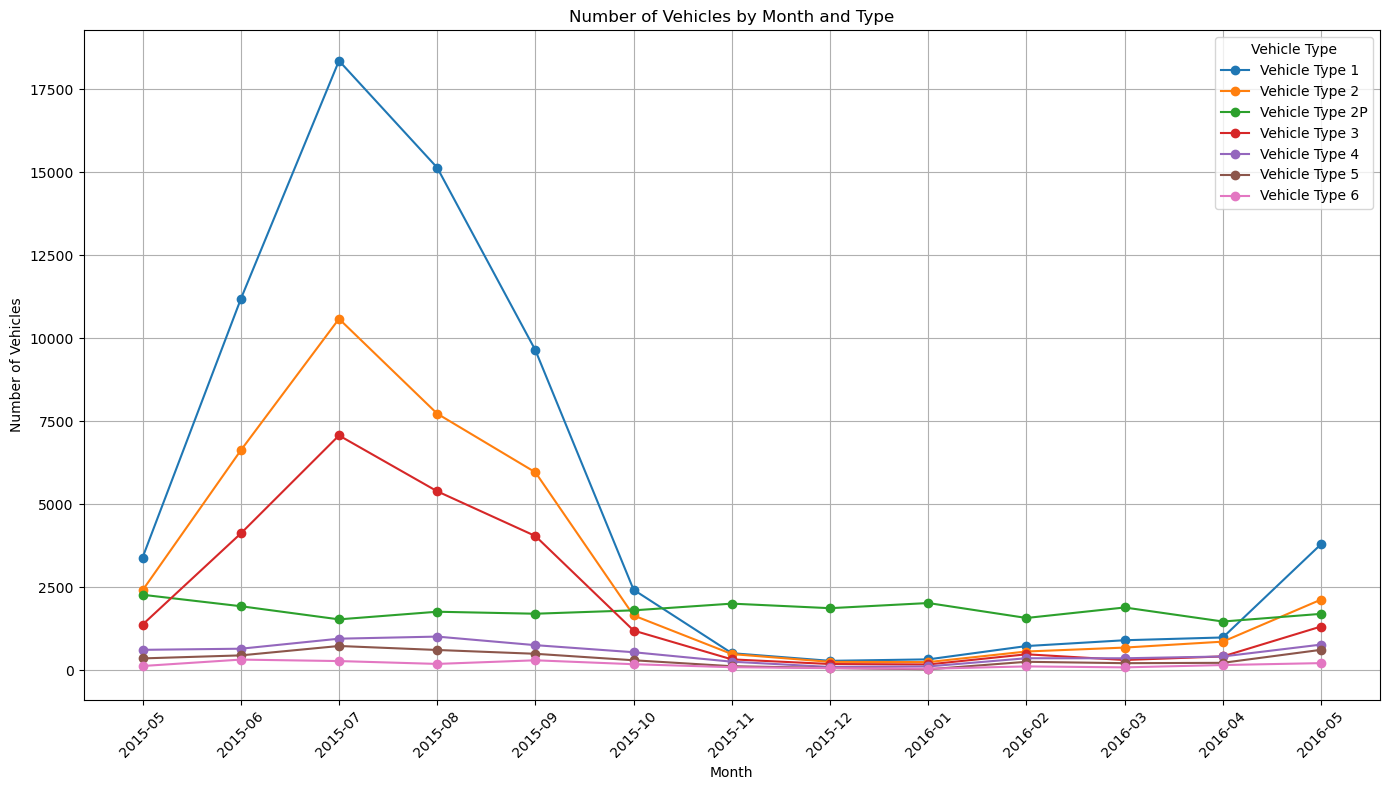

/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/3820021534.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vehicles['YearMonth'] = filtered_vehicles['Timestamp'].dt.to_period('M')


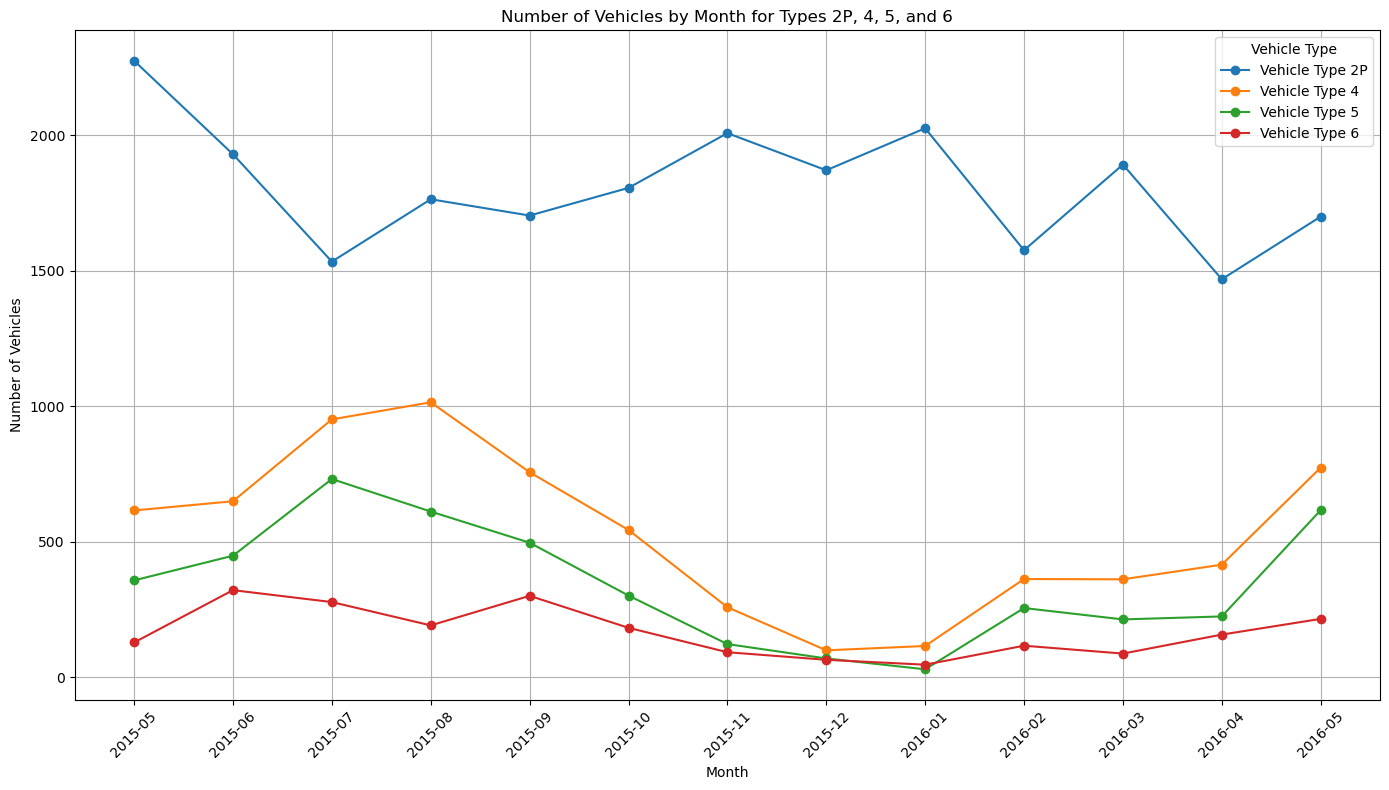

In [89]:
data['YearMonth'] = data['Timestamp'].dt.to_period('M')

monthly_vehicle_counts = data.groupby(['YearMonth', 'car-type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
for car_type in monthly_vehicle_counts.columns:
    plt.plot(monthly_vehicle_counts.index.astype(str), monthly_vehicle_counts[car_type], marker='o', linestyle='-', label=f'Vehicle Type {car_type}')

plt.xlabel('Month')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Month and Type')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.tight_layout()
plt.show()

filtered_vehicles = data[data['car-type'].isin(['2P', '4', '5', '6'])]
filtered_vehicles['YearMonth'] = filtered_vehicles['Timestamp'].dt.to_period('M')
monthly_vehicle_counts = filtered_vehicles.groupby(['YearMonth', 'car-type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
for car_type in monthly_vehicle_counts.columns:
    plt.plot(monthly_vehicle_counts.index.astype(str), monthly_vehicle_counts[car_type], marker='o', linestyle='-', label=f'Vehicle Type {car_type}')

plt.xlabel('Month')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Month for Types 2P, 4, 5, and 6')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.tight_layout()
plt.show()

LONG TERM PATTERNS OF LIFE 1

Plotting the number of vehicles by type and month, we observe that the park has a majority of visitors in from May to September. This indicates that the park would be located in the Northern Hemisphere as these corresponds to the warmer period of the year where there would be more wildlife to observe and more visitors (e.g. summer holidays). There is a peak in July for vehicles type 1, 2, and 3 (car, motorcycle, 2 and 3 axle truck). Similarly, the numbers of vehicles 4, 5, and 6 also peak around the same time. The number of 2P vehicles (park rangers) remains stable throughout the year. Visitors in vehicles 1, 2 and 3 are likelier to be leisure visitors who come and go independently when they please whereas vehicles 4 are likelier to be utility vehicles servicing the park (provision of supplies, trash removal, etc.) or just passing through the park as part of their larger route (e.g. transport vehicles). Buses of type 5 and 6 would ferry visitors to and from the park in larger numbers. The number of vehicles drops in December and January as it is winter, making it hard to navigate the park and the animals would be in hibernation.

/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/3852419397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vehicles['YearMonth'] = filtered_vehicles['Timestamp'].dt.to_period('M')
/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/3852419397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vehicles['DayOfWeek'] = filtered_vehicles['Timestamp'].dt.day_name()


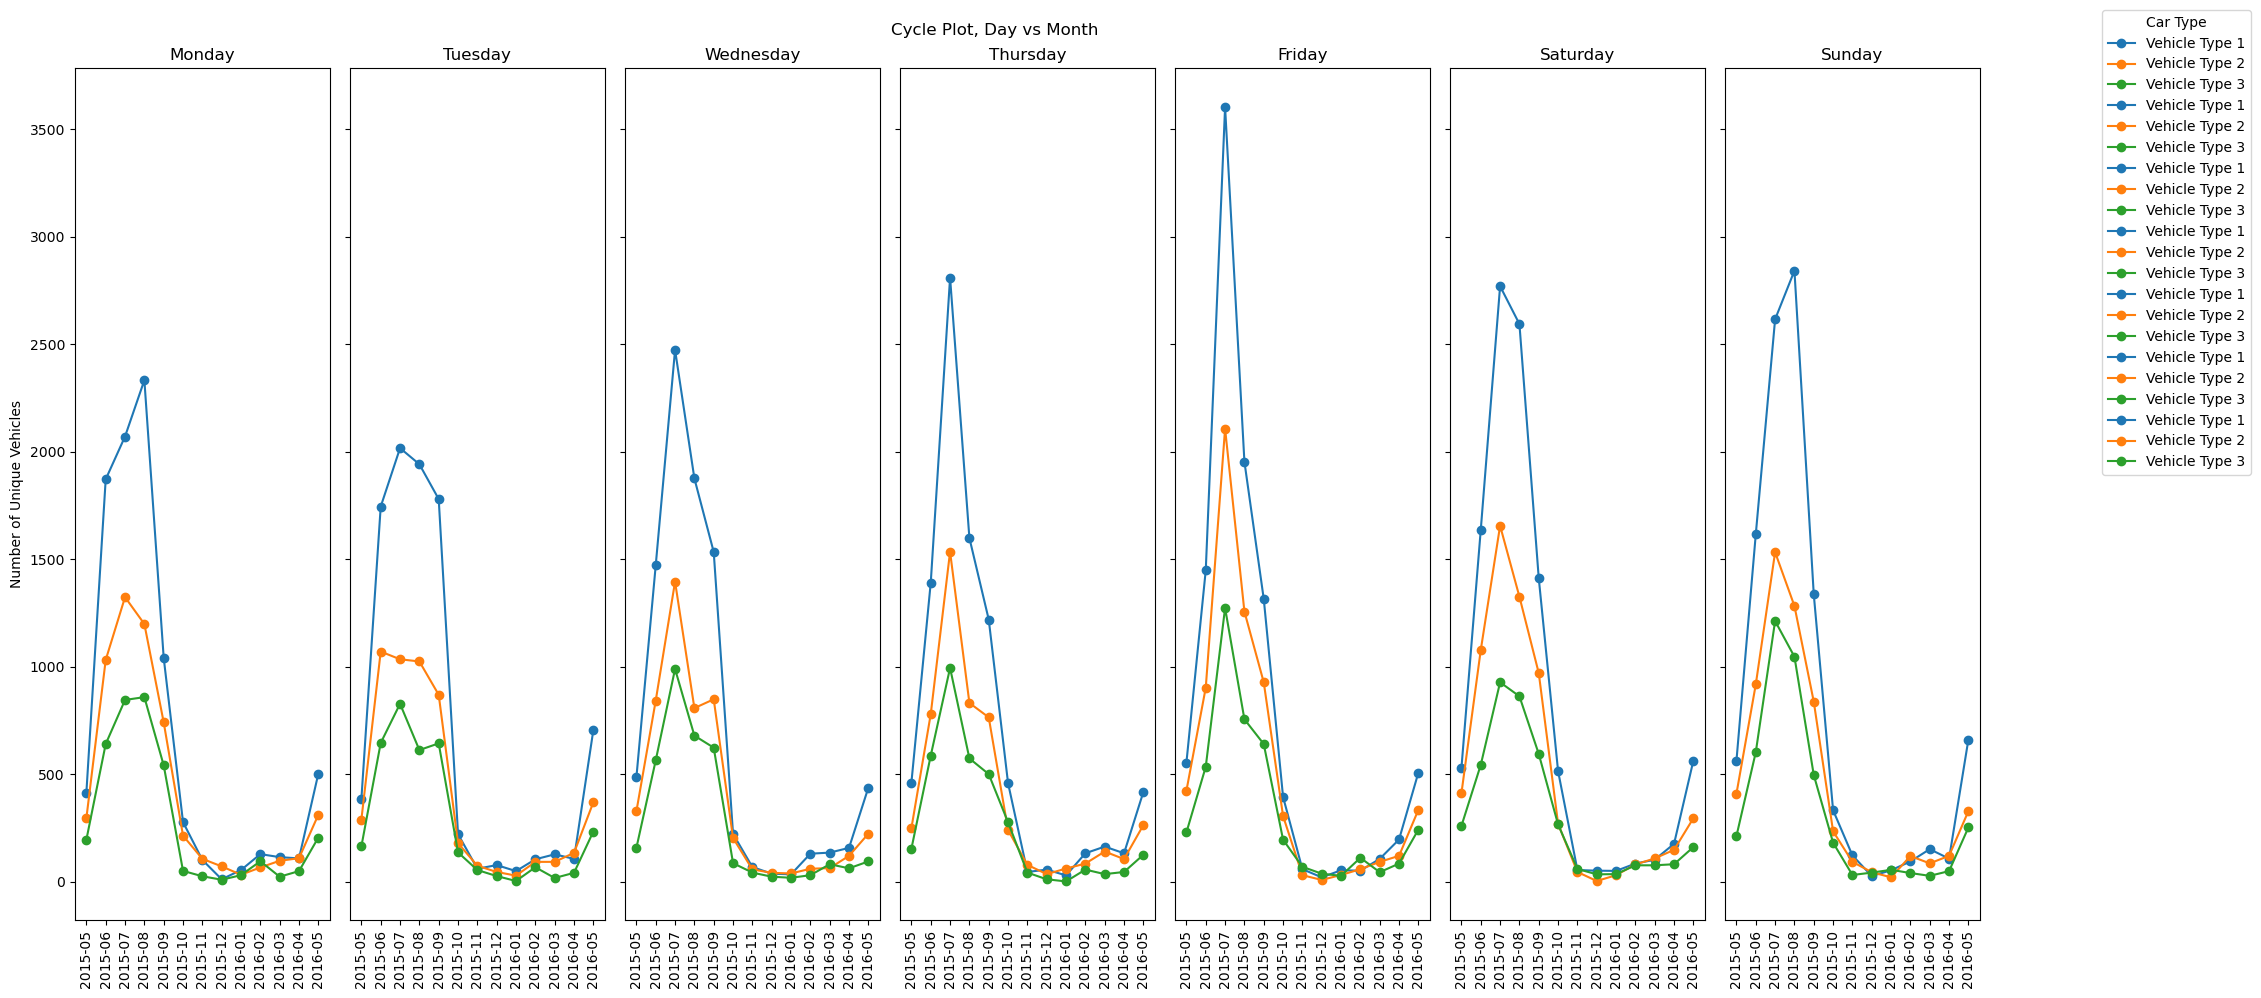

In [90]:

filtered_vehicles = data[data['car-type'].isin(['1', '2', '3'])]

filtered_vehicles['YearMonth'] = filtered_vehicles['Timestamp'].dt.to_period('M')
filtered_vehicles['DayOfWeek'] = filtered_vehicles['Timestamp'].dt.day_name()

cycle_plot_data = filtered_vehicles.groupby(['YearMonth', 'DayOfWeek', 'car-type']).size().unstack(fill_value=0).reset_index()

cycle_plot_data_pivoted = cycle_plot_data.pivot(index='YearMonth', columns='DayOfWeek', values=['1', '2', '3'])

fig, axes = plt.subplots(1, 7, figsize=(20, 10), sharey=True, sharex=True)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, day in enumerate(days_of_week):
    for car_type in ['1', '2', '3']:
        axes[i].plot(cycle_plot_data_pivoted.index.astype(str), cycle_plot_data_pivoted[(car_type, day)], marker='o', linestyle='-', label=f'Vehicle Type {car_type}')
    axes[i].set_title(day)
    axes[i].tick_params(axis='x', rotation=90)

axes[0].set_ylabel('Number of Unique Vehicles')
fig.suptitle('Cycle Plot, Day vs Month')
fig.legend(title='Car Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


LONG TERM PATTERNS OF LIFE 2

The number of vehicles entering the park increased on Friday, just before the weekend. Many vehicles of type 1,2 and 3 are entering the park to spend the week end there, as show by the cycle plot. The number of visitor is the lowest on Tuesday and Wednesday as it is the middle of the week. Visitors tend to take a day or two off on Friday and Monday to spend a long weekend in the park.

/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/1778849909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camping_events['Hour'] = camping_events['Timestamp'].dt.hour
/var/folders/10/7y1c43wj6m7dvq9dn7wwpghc0000gn/T/ipykernel_93351/1778849909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camping_events['Date'] = camping_events['Timestamp'].dt.date


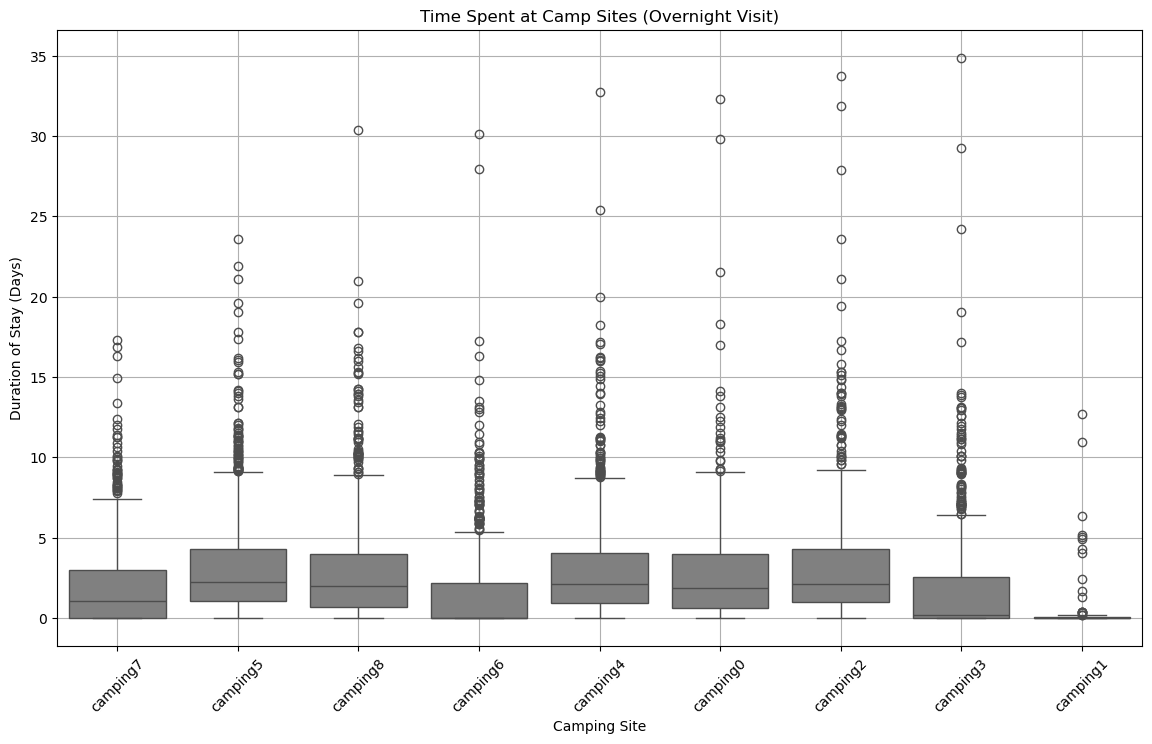

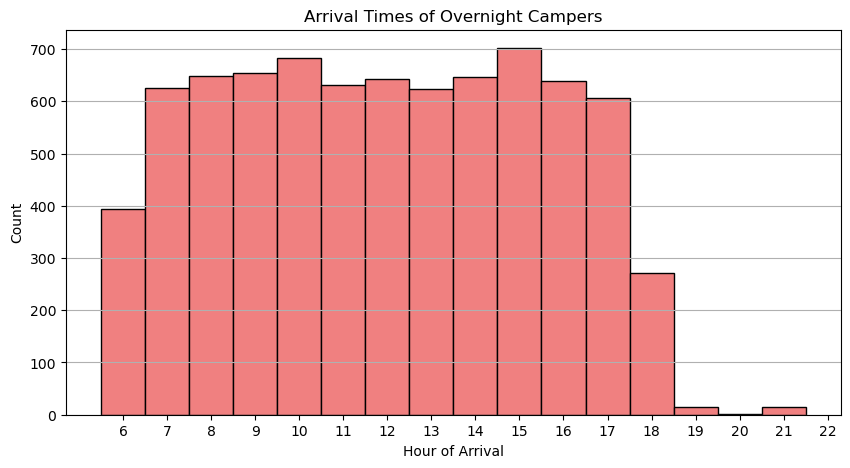

In [91]:
overnight_campers = data[data['car-type'].isin(['1', '2'])]

camping_events = overnight_campers[overnight_campers['gate-name'].str.contains('camping')]

camping_events['Hour'] = camping_events['Timestamp'].dt.hour
camping_events['Date'] = camping_events['Timestamp'].dt.date

camping_events = camping_events.sort_values(by=['car-id', 'Timestamp'])
camping_events['next_timestamp'] = camping_events.groupby('car-id')['Timestamp'].shift(-1)
camping_events['duration'] = (camping_events['next_timestamp'] - camping_events['Timestamp']).dt.total_seconds() / (24 * 3600)  # Convert to days

camping_events = camping_events[(camping_events['duration'] <= 35) & (camping_events['duration'] >= 0)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='gate-name', y='duration', data=camping_events, color='gray')
plt.xlabel('Camping Site')
plt.ylabel('Duration of Stay (Days)')
plt.title('Time Spent at Camp Sites (Overnight Visit)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(camping_events['Hour'], bins=range(6, 23), color='lightcoral', edgecolor='black', align='left')
plt.xlabel('Hour of Arrival')
plt.ylabel('Count')
plt.title('Arrival Times of Overnight Campers')
plt.grid(axis='y')
plt.xticks(range(6, 23))
plt.show()


LONG TERM PATTERNS OF LIFE 3

Over night campers arrive equally between 7am and 6pm. There are limited arrivals after 6pm as it would be dark and harder to set up camp. Overnight campers spend up to 35 days at camp sites. Camping site 1 has the shortest duration of stay. This is also the least visited camping site. It is possible that this is a remote camp site on difficult terrain.

Q1: Describe up to six daily patterns of life by vehicles traveling through and within the park. Characterize the patterns by describing the kinds of vehicles participating, their spatial activities (where do they go?), their temporal activities (when does the pattern happen?), and provide a hypothesis of what the pattern represents.


Daily Pattern 1: Visitor Vehicles (2 Axle Cars and Motorcycles) - Daytime Activity

Kinds of Vehicles: 2 axle cars (car type '1') and motorcycles.

Spatial Activities: Primarily enter through main entrances and pass through general gates, without staying overnight. Frequently observed at general-gate7 and general-gate8.

Temporal Activities: High traffic between 8 AM and 6 PM, peaking around mid-day.

Hypothesis: These vehicles likely belong to day visitors engaging in activities like hiking, birdwatching, or picnicking. The pattern indicates they are just passing through the park.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Daily Pattern 2: Night Curfew for Campings

Kinds of Vehicles: 2 axle cars, 2 axle trucks, 3 axle trucks, and ranger vehicles.

Spatial Activities: Visiting camping sites.

Temporal Activities: No activity between 1:00 AM to 4:30 AM.

Hypothesis: Vehicles may not be allowed to enter campings in the middle of the night due to a curfew to minimize disturbance to wildlife and maintain safety.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Daily Pattern 3: Ranger Patrols

Kinds of Vehicles: Park service vehicles (2 axle trucks with a 'P' appended, car type '2P').

Spatial Activities: Frequently pass through ranger stops, general gates, and restricted areas accessible only to park services. Always start and end their journey at the ranger base.

Temporal Activities: Consistent activity from 6 AM to late evening, with no patrols between 3 AM and 6 AM. Patrols end earlier on Saturday night.

Hypothesis: These vehicles are used by park rangers for routine patrols, maintenance, and monitoring of the park.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Daily Pattern 4: Transport Vehicles

Kinds of Vehicles: Types 4, 5, and 6.

Spatial Activities: Pass through main arteries linking park entrances, avoiding camping sites and other peripheral gates.

Temporal Activities: Constant throughout the day, with minor peaks around the same times.

Hypothesis: These vehicles are either delivery trucks, maintenance vehicles, or tour buses. Buses might be passing through the park as a shortcut or ferrying people to and from areas outside the park.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Daily Pattern 5: Day Campers

Kinds of Vehicles: 2 axle cars, 2 axle trucks, and 3 axle trucks (car types 1, 2, and 3).

Spatial Activities: Enter various camping sites throughout the day and leave on the same day.

Temporal Activities: Arrive before 10 AM and leave before it gets dark. The length of stay varies from a few minutes to 11 hours.

Hypothesis: These visitors are engaging in day activities at the camping sites, such as enjoying natural attractions like lakes, rather than staying overnight.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Daily Pattern 6: Low Activity for Heavy Trucks

Kinds of Vehicles: Heavy trucks (car types 3, 4, 5, and 6).

Spatial Activities: Limited movement, often restricted to certain gates, indicating specialized or occasional usage.

Temporal Activities: Much lower traffic, with minor peaks around the same times as other vehicles.

Hypothesis: These could be utility vehicles servicing the park, delivery trucks, or buses with specific routes.

Q2: Describe up to six patterns of life that occur over multiple days (including across the entire data set) by vehicles traveling through and within the park. Characterize the patterns by describing the kinds of vehicles participating, their spatial activities (where do they go?), their temporal activities (when does the pattern happen?), and provide a hypothesis of what the pattern represents.

Long Term Pattern 1: Seasonal Visitor Peaks

Kinds of Vehicles: All vehicle types, especially types 1, 2, and 3.

Spatial Activities: High traffic through many general gates.

Temporal Activities: Majority of visitors from May to September, peaking in July. Lower activity in December and January.

Hypothesis: The park likely attracts more visitors during warmer months due to better weather and school holidays. Winter sees reduced activity due to harder navigation and wildlife hibernation.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Long Term Pattern 2: Weekend Influx

Kinds of Vehicles: Primarily 2 axle cars, motorcycles, and trucks (types 1, 2, and 3).

Spatial Activities: Increased entry through main entrances and general gates on Fridays, indicating weekend visits.

Temporal Activities: Higher vehicle entries on Fridays, lowest on Tuesdays and Wednesdays.

Hypothesis: Visitors likely spend weekends in the park, taking a day or two off on Friday or Monday for a long weekend.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Long Term Pattern 3: Overnight Campers

Kinds of Vehicles: 2 axle cars and trucks (types 1 and 2).

Spatial Activities: Enter various camping sites and stay for extended periods.

Temporal Activities: Arrivals between 7 AM and 6 PM. Duration of stay up to 35 days, with limited arrivals after 6 PM.

Hypothesis: These vehicles belong to visitors who camp overnight, taking advantage of the park’s natural setting. Camping site 1 has the shortest duration of stay, possibly due to difficult terrain.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Long Term Pattern 4: Routine Park Maintenance

Kinds of Vehicles: Park service vehicles (2P).

Spatial Activities: High activity at ranger-base and several ranger-stop locations.

Temporal Activities: Consistent throughout the year, with no significant seasonal variations.

Hypothesis: These vehicles are used by park rangers for routine maintenance and monitoring of the park, ensuring the safety and upkeep of the preserve.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Long Term Pattern 5: Heavy Trucks and Utility Vehicles

Kinds of Vehicles: Types 3, 4, 5, and 6.

Spatial Activities: Restricted to certain gates, indicating specialized or occasional usage.

Temporal Activities: Sporadic throughout the year, with no significant peaks.

Hypothesis: These vehicles might be used for delivery, maintenance, or special projects within the park. Their infrequent activity suggests they are not regular visitors.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Long Term Pattern 6: Decline in Wildlife Areas

Kinds of Vehicles: All vehicle types.

Spatial Activities: Frequent movement through general gates and camping sites.

Temporal Activities: Consistent reduction in vehicle traffic in areas known for wildlife activity, possibly due to conservation efforts.

Hypothesis: Efforts to protect wildlife habitats might be leading to a decline in vehicle traffic in these areas, indicating successful implementation of conservation strategies.

Note: Some long-term patterns are similar to daily patterns, such as the consistent patrols by ranger vehicles and the peak visitation periods during weekends and holidays, reflecting both daily and extended behaviors within the park.